In [1]:
import re

def extract_kbps_out(file_path):
    """
    Extract the last numeric value (assumed to be throughput in KB/s) from each line of the file.
    """
    kbps_out = []
    print(f"Reading file: {file_path}")
    try:
        with open(file_path, 'r') as file:
            for line in file:
                # Match the last number in the line (integer or float)
                match = re.search(r'\s+(\d+\.\d+|\d+)\s*$', line)
                if match:
                    kbps = float(match.group(1))
                    kbps_out.append(kbps)
    except FileNotFoundError:
        print(f"File not found: {file_path}")
    except Exception as e:
        print(f"An error occurred: {e}")
    return kbps_out

# File path for IPv6 throughput data
file_path = 'data/throughtput/ipv6_udp_throughput.txt'

# Extract KB/s out values
ipv6_throughput = extract_kbps_out(file_path)

# Print raw throughput values
print(ipv6_throughput)

# Normalize throughput values to percentage
max_kbps_out = max(ipv6_throughput)
ipv6_throughput = [kbps_out / max_kbps_out * 100 for kbps_out in ipv6_throughput]

# Print normalized values
print(ipv6_throughput)

# File path for SRv6 throughput data
file_path = 'data/throughtput/srv6_udp_throughput.txt'

# Extract KB/s out values
srv6_throughput = extract_kbps_out(file_path)

# Print raw throughput values
print(srv6_throughput)

# Normalize throughput values to percentage
max_kbps_out = max(srv6_throughput)
srv6_throughput = [kbps_out / max_kbps_out * 100 for kbps_out in srv6_throughput]

# Print normalized values
print(srv6_throughput)


Reading file: data/throughtput/ipv6_udp_throughput.txt
[65488.4, 65139.93, 64967.42, 65908.22, 65458.52, 65114.9, 65418.6, 65525.31, 65387.9, 65565.81, 65445.12, 65512.19, 65517.34, 64527.86, 66238.68, 65498.83, 65509.35, 65389.19, 65598.84, 65393.54, 65442.48, 65549.95, 65324.03, 64661.55, 65557.47, 65402.06, 65553.15, 65454.76, 64695.52, 66128.68, 65106.61, 64293.6, 65886.05, 63683.31, 65894.98, 63942.21, 64963.34, 65714.67, 65154.01, 63500.81, 62099.35, 65079.74, 65579.49, 64576.55, 64196.13, 65274.13, 64404.31, 65447.6, 65266.41, 65147.0, 65734.02, 65125.44, 65641.99, 65517.65, 65437.2, 65610.6, 65283.52, 65570.5, 65533.83, 65442.18, 65552.3, 65553.03, 65392.43, 65378.17, 65450.77, 64869.32, 65324.03, 65247.07, 64715.45, 65152.77, 65585.63, 63829.43, 66097.37, 64009.24, 65008.83, 65127.59, 64479.23, 65653.69, 64219.63, 66568.72, 65381.16, 65535.54, 65494.88, 65357.32, 65522.01, 65518.84, 65331.94, 65506.09, 65583.71, 65549.45, 65502.05, 65199.5, 65452.51, 65377.73, 65666.88, 65509.

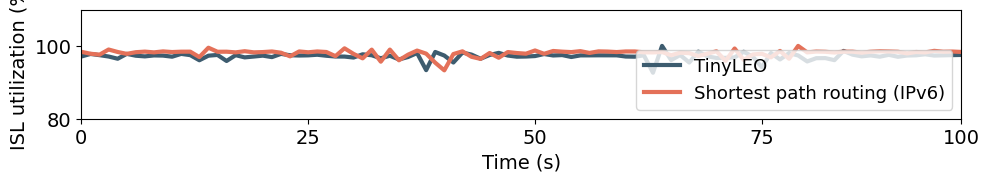

In [3]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['pdf.fonttype'] = 42  # Ensure PDF compatibility with modern fonts

def plot_utilization_time_series(data_list, labels, colors):
    """
    Plot ISL utilization over time for different routing strategies.
    """
    plt.figure(figsize=(10, 2))

    for utilization, label, color in zip(data_list, labels, colors):
        time_stamps = range(len(utilization))
        linestyle = '--' if label == 'Shortest path propagation delay' else '-'
        linewidth = 4 if linestyle == '--' else 3
        plt.plot(time_stamps, utilization, label=label, color=color, linewidth=linewidth, linestyle=linestyle)

    plt.xlabel('Time (s)', fontsize=14)
    plt.ylabel('ISL utilization (%)', fontsize=14)
    plt.tick_params(axis='both', which='major', labelsize=14)
    
    # Set x and y limits
    plt.xlim(0, 97)
    plt.xticks([0, 25, 50, 75, 97], [0, 25, 50, 75, 100])
    plt.ylim(80, 110)

    # Add legend
    plt.legend(fontsize=13, loc='lower right')

    plt.tight_layout()
    
    # Save figures
    plt.savefig('figures/figure19c.pdf', dpi=300, bbox_inches='tight')
    plt.savefig('figures/figure19c.png', dpi=300, bbox_inches='tight')
    
    plt.show()

# Input data
data_list = [srv6_throughput, ipv6_throughput]
labels = ['TinyLEO', 'Shortest path routing (IPv6)']
colors = ['#3D5C6F', '#E47159']  # Trim to used colors

# Plot
plot_utilization_time_series(data_list, labels, colors)
